In [233]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

In [234]:
# Set vars
stocks = ["^GSPC"]
benchmark = "^GSPC"
start_date = '2004/02/01'
end_date = '2021/01/01'
interval = 'm'
risk_free_rate = 0.015 / num_periods
num_periods = 12
start_balance = 100000

# Get data
symbols = stocks
symbols.append(benchmark)
hist = web.get_data_yahoo(symbols, start_date, end_date, interval = interval)['Adj Close']
returns = hist.pct_change()
print(returns)
results = pd.DataFrame()
portfolio_balance = pd.DataFrame()

Symbols        ^GSPC
Date                
2004-02-01       NaN
2004-03-01 -0.016359
2004-04-01 -0.016791
2004-05-01  0.012083
2004-06-01  0.017989
...              ...
2020-09-01 -0.039228
2020-10-01 -0.027666
2020-11-01  0.107546
2020-12-01  0.037121
2021-01-01 -0.011137

[204 rows x 1 columns]


In [235]:
mean_stock = returns[stocks[0]].mean() * num_periods
portfolio_weights = [0,0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8,0.9,1]
# print(portfolio_weights)
for ind in portfolio_weights:
    print(ind)
    portfolio_name = str(round(ind, 2)) + "/" + str(round(1-ind, 2))
    combined_rate = returns[stocks[0]] * ind + (1-ind) * risk_free_rate
    results[portfolio_name] = combined_rate
    portfolio_balance[portfolio_name] = start_balance + np.cumsum(start_balance * (results[portfolio_name]))
    # print(portfolio_balance)
# portfolio_balance[benchmark] = start_balance + np.cumsum(start_balance*returns[stocks[1]])
print(portfolio_balance)

    

0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1
                 0/1        0.1/0.9  ...        0.9/0.1            1/0
Date                                 ...                              
2004-02-01       NaN            NaN  ...            NaN            NaN
2004-03-01  100125.0   99948.910804  ...   98540.197234   98364.108038
2004-04-01  100250.0   99893.503284  ...   97041.529558   96685.032842
2004-05-01  100375.0  100126.837785  ...   98141.540067   97893.377852
2004-06-01  100500.0  100419.227773  ...   99773.049956   99692.277729
...              ...            ...  ...            ...            ...
2020-09-01  124875.0  134917.870192  ...  215260.831728  225303.701920
2020-10-01  125000.0  134753.712330  ...  212783.410968  222537.123298
2020-11-01  125125.0  135941.668684  ...  222475.018158  233291.686842
2020-12-01  125250.0  136425.383275  ...  225828.449476  237003.832751
2021-01-01  125375.0  136426.516668  ...  224838.650008  235890.166676

[204 rows x 11 columns]


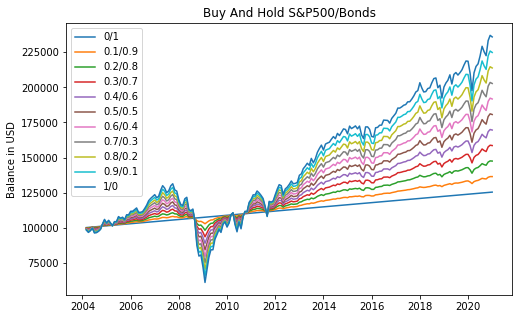

In [236]:
# Plot graph
plt.figure(figsize=(8,5))
for item in portfolio_balance:
    portfolio_balance[item]
    plt.plot(portfolio_balance[item], label=item)
plt.title("Buy And Hold S&P500/Bonds")
plt.ylabel('Balance in USD')
plt.legend()
plt.show()